<AxesSubplot: xlabel='m', ylabel='Diversidade'>

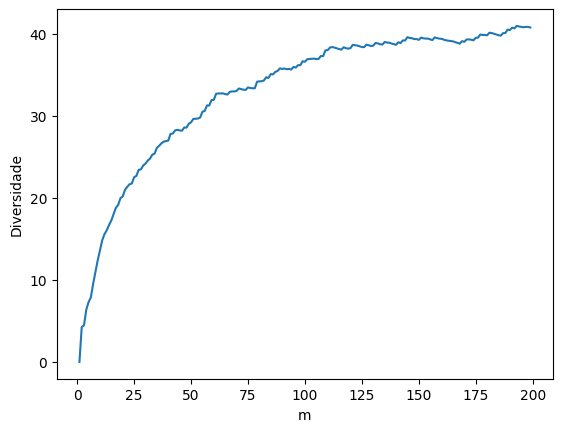

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_file():
    file = open("myfile.txt", "r")
    content = file.read()
    file.close()
    return content

def init_matrix(nLins, nCols):
    D = [None] * nLins
    for i in range(nLins):
        D[i] = [0] * nCols
        for j in range(nCols):
            D[i][j] = 0
    return D

def linearize(matriz, n):
    l = 0
    D = init_matrix(n, n)
    for i in range(n, 0, -1):
        for j in range(l, n, 1):
            aux = 0

            for k in range(0, n, 1):
                aux += (matriz[n-i][k]-matriz[j][k])**2
            
            aux = math.sqrt(aux)
            #aux= "{:.2f}".format(aux)
            D[j][l] = aux
            D[l][j] = aux
        
        l += 1 

    return D

def return_posi_max(D, m):
    D = np.array(D)
    conj = init_matrix(m,2)
    n = l = 0
    aux = sorted([j for i in D for j in i], reverse = True)
    for i in range(m):
        array = np.where(D == aux[i])
        j = array[0][0]
        k = array[1][0]
        conj[l] = [j, k]
        l = l+1
    return conj

def return_elements(conj, m):
    array = []
    array = [-1 for i in range(m)]
    j = k = i =0
    for l in range(len(conj)):
        j = conj[l][0]
        k = conj[l][1]
        if not((int(j) in array)) and i<m:
            array[i] = int(j)
            i = i+1
        if not ((int(k) in array)) and i<m:
            array[i] = int(k)
            i = i+1
        if(i == m):
            break
    return array

def sum_lin(D,n):
    sum = 0
    for i in range(n):
        for j in range(0, i, 1):
            sum += D[i][j]

    if(n>1):
        sum = sum/(n*(n-1)/2)
        return sum
    else:
        return 0

                
content = read_file()
N = eval(content)

D = linearize(N, len(N))
sum = list()
for m in range(1, len(N), 1):
    conj = return_posi_max(D, m)
    elementos = return_elements(conj, m)
    M = init_matrix(m, m)
    for i in range(m):
        M[i] = N[elementos[i]]
    D_m = linearize(M, m)
    sum.append(sum_lin(D_m, m))
    
data = pd.Series({
    'Diversidade': sum,
    'm': [i  for i in range(1,len(N))]
})
sns.lineplot(data=data, y='Diversidade', x='m')